In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [9]:
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [10]:
df.shape

(6607, 20)

In [12]:
df1=df.iloc[:,[0,19]]

In [14]:
df1

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70
...,...,...
6602,25,68
6603,23,69
6604,20,68
6605,10,68


In [47]:
X = df.iloc[:, [0]].values   # pehla column (study hours)
y = df.iloc[:, 19].values  # 20th column (exam score)


In [45]:
X


array([[23],
       [19],
       [24],
       ...,
       [20],
       [10],
       [15]])

In [48]:
y

array([67, 61, 74, ..., 68, 68, 64])

In [16]:
df1.isnull().sum()

Hours_Studied    0
Exam_Score       0
dtype: int64

from sklearn.import TrainTestSplit

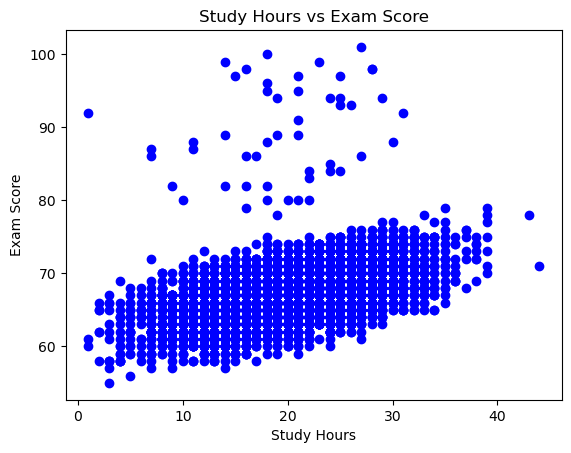

In [36]:
import matplotlib.pyplot as plt

# 1) Scatter plot: StudyHours vs ExamScore
plt.scatter(X,y, color="blue")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42
                                              )

In [54]:
X_train.shape


(5285, 1)

In [55]:
X_test.shape

(1322, 1)

In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)


In [68]:
y_pred
Y_test

array([65, 65, 71, ..., 66, 63, 72])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Errors
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 2.4475687452945643
MSE: 10.855921288793322
RMSE: 3.294832513010839
R² Score: 0.2319868674542105


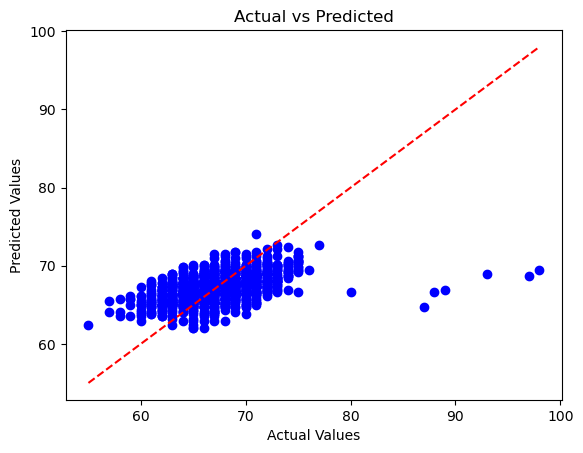

In [70]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


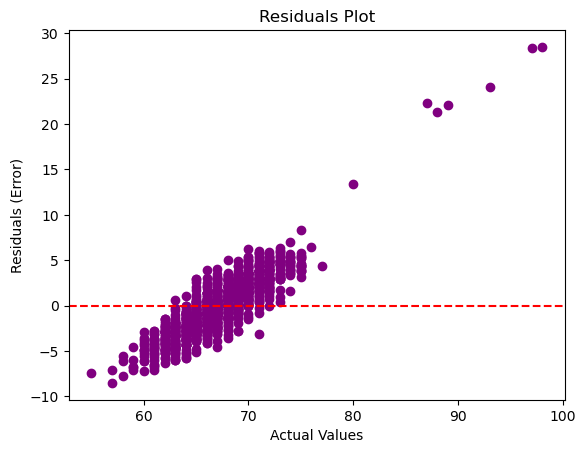

In [71]:
residuals = Y_test - y_pred

plt.scatter(Y_test, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Error)")
plt.title("Residuals Plot")
plt.show()


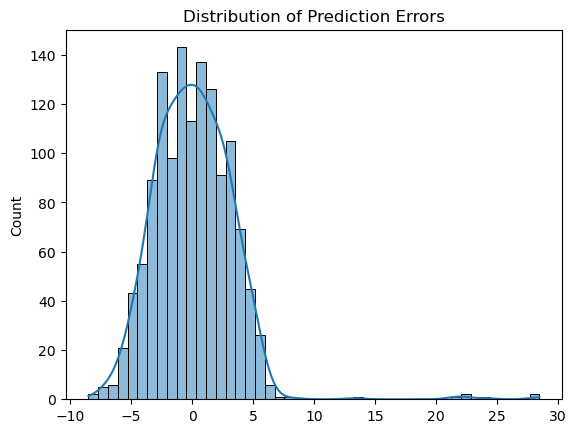

In [72]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.show()


In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Polynomial features create karo (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, Y_train)

# Predict test set
X_test_poly = poly.transform(X_test)
y_poly_pred = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(Y_test, y_poly_pred)
r2_poly = r2_score(Y_test, y_poly_pred)
print("Polynomial MSE:", mse_poly)
print("Polynomial R2 Score:", r2_poly)


Polynomial MSE: 10.84498813570501
Polynomial R2 Score: 0.23276034442853466


In [77]:
new_hours = np.array([[4], [6], [8], [10]])

# Predict exam scores using trained model
predicted_scores = model.predict(new_hours)

In [79]:
predicted_scores

array([62.65384245, 63.22517994, 63.79651742, 64.36785491])